### Given that we know a bit about dropout, a question arises — why do we need dropout at all? Why do we need to literally shut-down parts of a neural networks?

A fully connected layer occupies most of the parameters, and hence, neurons develop co-dependency amongst each other during training which curbs the individual power of each neuron leading to over-fitting of training data.


Dropout is an approach to regularization in neural networks which helps reducing interdependent learning amongst the neurons.


### Ensemble Defination

And in that sense it helps to view dropout as a form of ensemble learning. In ensemble learning we take a number of ‘weaker’ classifiers, train them separately and then at test time we use them by averaging the responses of all ensemble members. Since each classifier has been trained separately, it has learned different ‘aspects’ of the data and their mistakes are different. Combining them helps to produce an stronger classifier, which is less prone to overfitting. Random Forests or GBTs are typical ensemble classifiers.

In [28]:
import torch
import matplotlib.pyplot as plt

In [29]:

# torch.manual_seed(1)    # reproducible

N_SAMPLES = 20
N_HIDDEN = 300

#torch.unsqueeze#
#x= torch.tensor([1,2,3,4])
#print x.shape
#x=x.unsqueeze(dim=-2)
#print x.shape

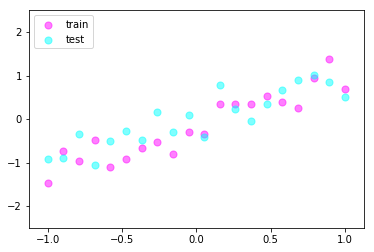

In [30]:
# training data
x = torch.unsqueeze(torch.linspace(-1, 1, N_SAMPLES), 1)
#print x
y = x + 0.3*torch.normal(torch.zeros(N_SAMPLES, 1), torch.ones(N_SAMPLES, 1))

# test data
test_x = torch.unsqueeze(torch.linspace(-1, 1, N_SAMPLES), 1)
test_y = test_x + 0.3*torch.normal(torch.zeros(N_SAMPLES, 1), torch.ones(N_SAMPLES, 1))

# show data
plt.scatter(x.data.numpy(), y.data.numpy(), c='magenta', s=50, alpha=0.5, label='train')
plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='cyan', s=50, alpha=0.5, label='test')
plt.legend(loc='upper left')
plt.ylim((-2.5, 2.5))
plt.show()


In [31]:
torch.nn.BatchNorm1d?

In [32]:

net_overfitting = torch.nn.Sequential(
    torch.nn.Linear(1, N_HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, N_HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, 1),
)

net_dropped = torch.nn.Sequential(
    torch.nn.Linear(1, N_HIDDEN),
    torch.nn.Dropout(0.42),  # drop 50% of the neuron
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, N_HIDDEN),
    torch.nn.BatchNorm1d(N_HIDDEN),  # drop 50% of the neuron
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, 1),
)


In [33]:

print(net_overfitting)  # net architecture
print(net_dropped)



Sequential(
  (0): Linear(in_features=1, out_features=300, bias=True)
  (1): ReLU()
  (2): Linear(in_features=300, out_features=300, bias=True)
  (3): ReLU()
  (4): Linear(in_features=300, out_features=1, bias=True)
)
Sequential(
  (0): Linear(in_features=1, out_features=300, bias=True)
  (1): Dropout(p=0.42)
  (2): ReLU()
  (3): Linear(in_features=300, out_features=300, bias=True)
  (4): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
  (6): Linear(in_features=300, out_features=1, bias=True)
)


In [34]:
optimizer_ofit = torch.optim.Adam(net_overfitting.parameters(), lr=0.01)
optimizer_drop = torch.optim.Adam(net_dropped.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()



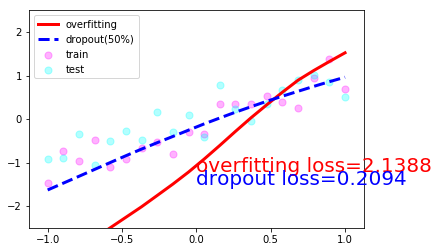

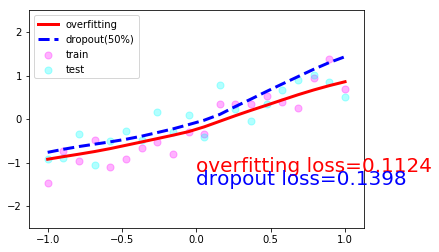

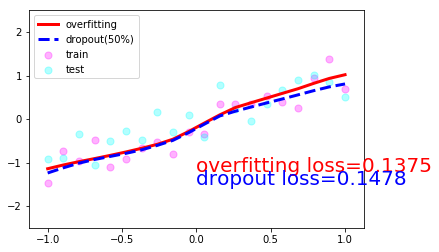

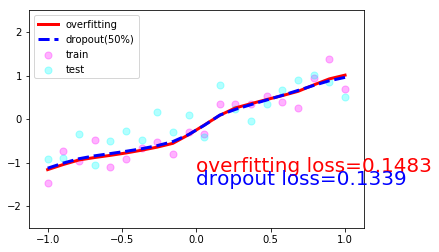

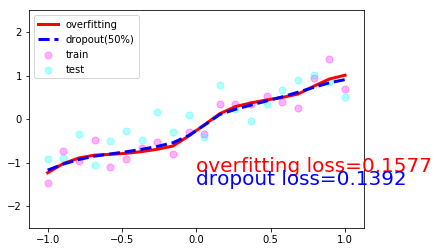

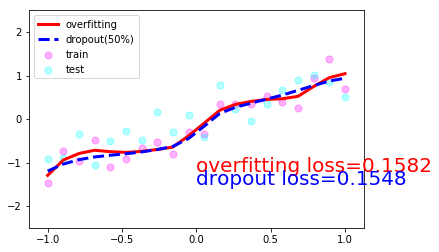

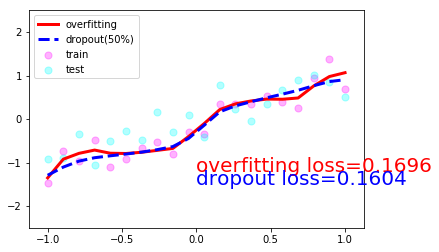

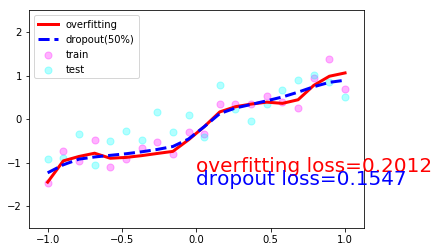

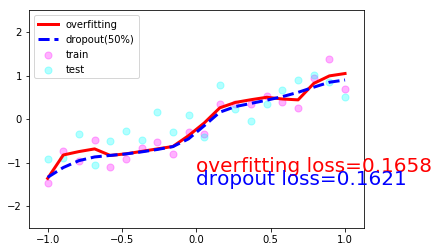

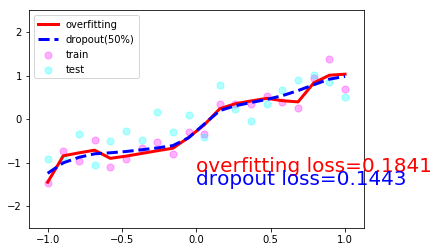

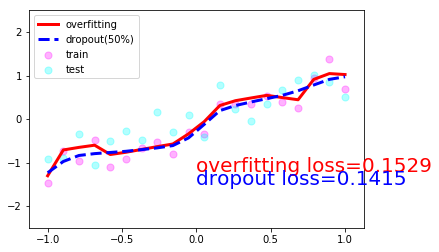

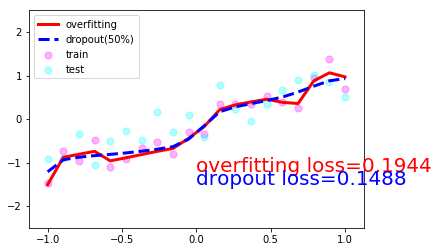

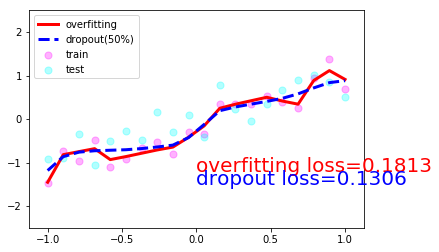

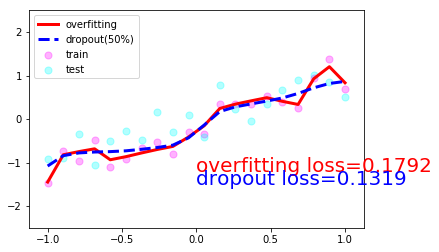

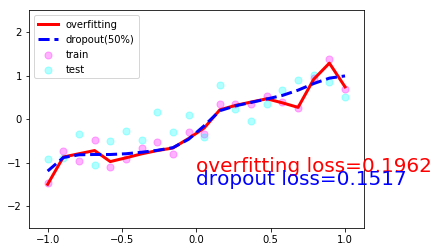

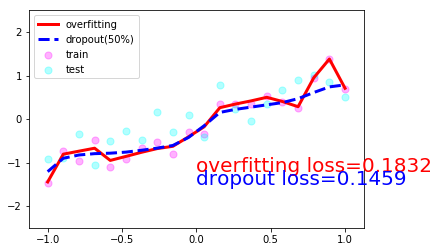

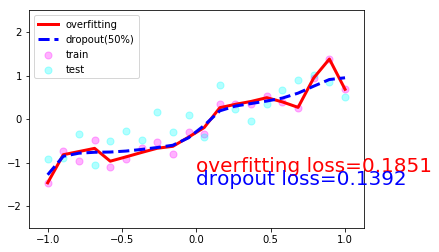

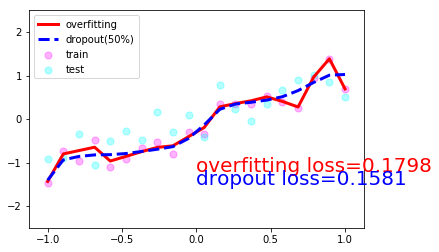

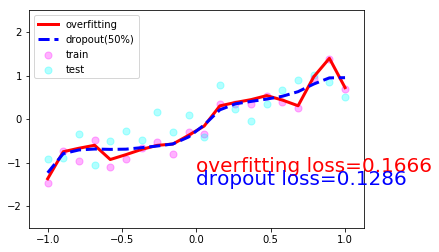

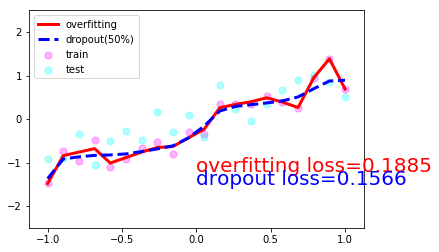

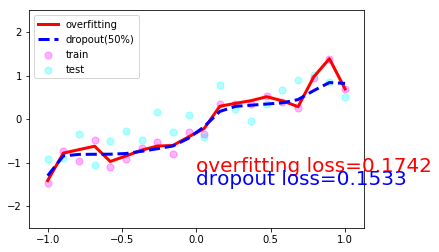

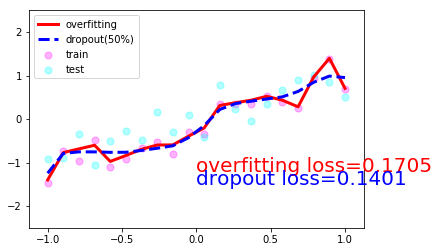

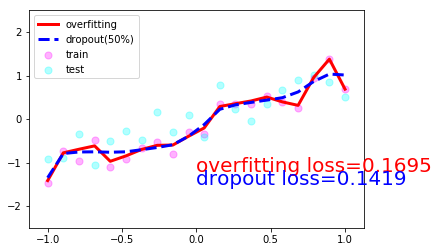

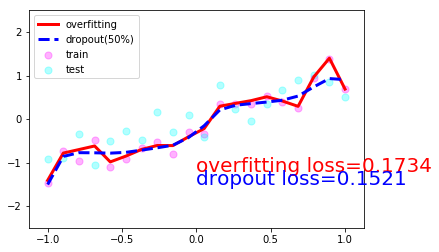

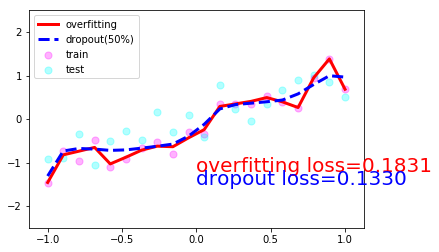

In [35]:

for t in range(500):
    pred_ofit = net_overfitting(x)
    pred_drop = net_dropped(x)
    loss_ofit = loss_func(pred_ofit, y)
    loss_drop = loss_func(pred_drop, y)

    optimizer_ofit.zero_grad()
    optimizer_drop.zero_grad()
    loss_ofit.backward()
    loss_drop.backward()
    optimizer_ofit.step()
    optimizer_drop.step()

    if t % 20 == 0:
        # change to eval mode in order to fix drop out effect
        net_overfitting.eval()
        net_dropped.eval()  # parameters for dropout differ from train mode

        # plotting
        plt.cla()
        test_pred_ofit = net_overfitting(test_x)
        test_pred_drop = net_dropped(test_x)
        plt.scatter(x.data.numpy(), y.data.numpy(), c='magenta', s=50, alpha=0.3, label='train')
        plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='cyan', s=50, alpha=0.3, label='test')
        plt.plot(test_x.data.numpy(), test_pred_ofit.data.numpy(), 'r-', lw=3, label='overfitting')
        plt.plot(test_x.data.numpy(), test_pred_drop.data.numpy(), 'b--', lw=3, label='dropout(50%)')
        plt.text(0, -1.2, 'overfitting loss=%.4f' % loss_func(test_pred_ofit, test_y).data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.text(0, -1.5, 'dropout loss=%.4f' % loss_func(test_pred_drop, test_y).data.numpy(), fontdict={'size': 20, 'color': 'blue'})
        plt.legend(loc='upper left'); plt.ylim((-2.5, 2.5));plt.pause(0.1)

        # change back to train mode
        net_overfitting.train()
        net_dropped.train()

        plt.show()

In [36]:
import numpy as np

In [37]:
mean_01 = np.array([1.0, 4.0])
mean_02 = np.array([10.0, -4.0])

cov_01 = np.array([[3.0, 0.0],[0.0, 300.0]])
cov_02 = np.array([[3.0, 1.0],[1.0, 3.0]])

data_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
data_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

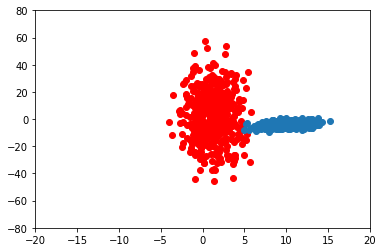

In [38]:
plt.xlim(-20, 20)
plt.ylim(-80, 80)
plt.scatter(data_01[:, 0], data_01[:, 1], color='red')
plt.scatter(data_02[:, 0], data_02[:, 1])
plt.show()

In [39]:
cov_03 = np.array([[5.0, 0.0],[0.0, 5.0]])
mean_03 = np.array([10.0, 40.0])

In [49]:
X1 = (data_01 - data_01.mean(axis=0)) / np.std(data_01)  #DO THIS ALSO #np.std(data_01,0)
X2 = (data_02 - data_02.mean(axis=0)) / np.std(data_02)                #np.std(data_02,1)
print X2.mean()

-1.7763568394002505e-18


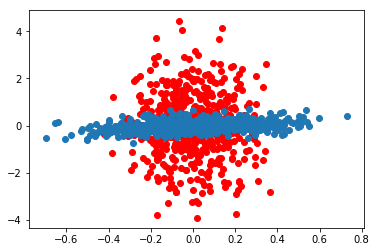

In [50]:
# plt.xlim(-20, 20)
# plt.ylim(-80, 80)
plt.scatter(X1[:, 0], X1[:, 1], color='r')
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

In [42]:
x1 = X1.dot(cov_03) + mean_03
x2 = X2.dot(cov_03) + mean_03

print x1.shape
print x2.shape

(500, 2)
(500, 2)


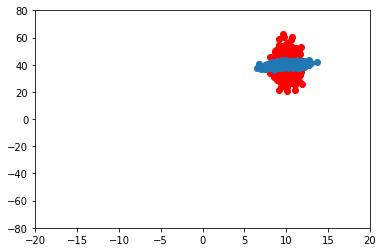

In [43]:
plt.xlim(-20, 20)
plt.ylim(-80, 80)
plt.scatter(x1[:, 0], x1[:, 1], color='r')
plt.scatter(x2[:, 0], x2[:, 1])
plt.show()

In [46]:
#plt.scatter(X1[:, 0], X1[:, 1])
#plt.show()